In [2]:
from sklearn import metrics
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Data Collection and reading
data1='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_15_Certification_Project_Python_Certification_Training/uv2towea1d/OnlineNewsPopularity.csv'

#df=pd.read_csv(data)


data = pd.read_csv(data1)
data.head()




,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


0     593
1     711
2    1500
3    1200
4     505
Name: shares, dtype: int64

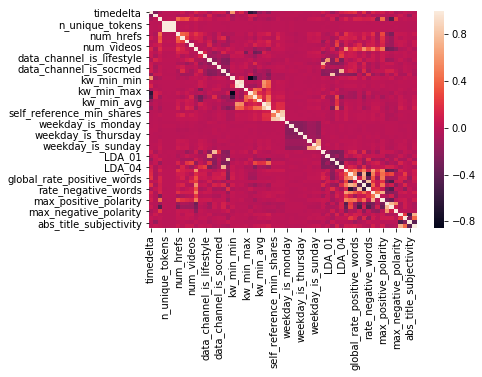

In [4]:
# Analysing data & finding dependent and independent variables
X = data.iloc[:, 1:60]
X.head()

corr = X.corr()
sns.heatmap(corr)
rcParams['figure.figsize'] = 20, 20

Y = data["shares"]
Y.head()




In [10]:
X.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [11]:
X.timedelta.unique()

array([731., 730., 729., 728., 727., 726., 725., 724., 723., 722., 721.,
       720., 719., 718., 717., 716., 715., 714., 713., 712., 711., 710.,
       709., 708., 707., 706., 705., 704., 703., 702., 701., 700., 699.,
       698., 697., 696., 695., 694., 693., 692., 691., 690., 689., 688.,
       687., 686., 685., 684., 683., 682., 681., 680., 679., 678., 677.,
       676., 675., 674., 673., 672., 671., 670., 669., 668., 667., 666.,
       665., 664., 663., 662., 661., 660., 659., 658., 657., 656., 655.,
       654., 653., 652., 651., 650., 649., 648., 647., 646., 645., 644.,
       643., 642., 641., 640., 639., 638., 637., 636., 635., 634., 633.,
       632., 631., 630., 629., 628., 627., 626., 625., 624., 623., 622.,
       621., 620., 619., 618., 617., 616., 615., 614., 613., 612., 611.,
       610., 609., 608., 607., 606., 605., 604., 603., 602., 601., 600.,
       599., 598., 597., 596., 595., 594., 593., 592., 591., 590., 589.,
       588., 587., 586., 585., 584., 583., 582., 58

In [5]:
# Splitting data into training and testing
train_x, test_x, train_y, test_y = train_test_split(
    X, Y, random_state=5, test_size=0.20)




In [6]:
# Initializing model and training model
lin_model = LinearRegression()
lin_model.fit(train_x, train_y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# Predict data
predicted = lin_model.predict(test_x)



In [8]:
# Mean Squared errors
metrics.mean_squared_error(predicted, test_y)





86231407.4332514

In [12]:
print(np.sqrt(metrics.mean_squared_error(predicted, test_y)))

9286.086766407656


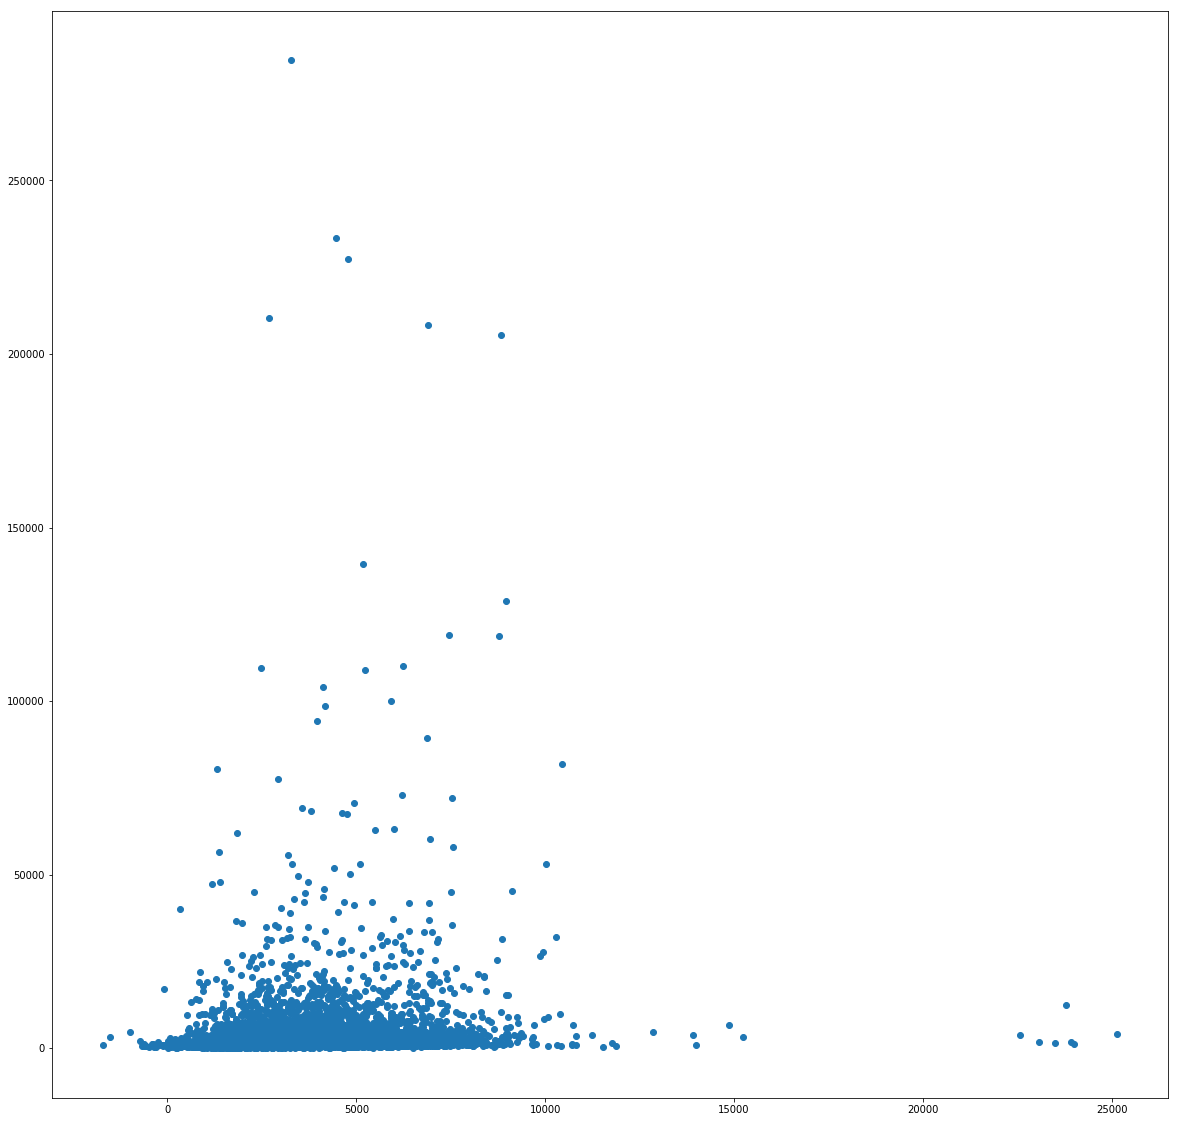

In [9]:
# Plotting predicted and test data
plt.scatter(predicted, test_y)
plt.show()